# Pruebas de Clase ImagePreprocessor

### Importo Librerias y Metodos Auxiliares

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import random
import numpy as np
import matplotlib.image as mpimg
from pathlib import Path
import logging
import cv2

# Agrego path de root
ROOT_PATH = str(Path.cwd().parent.parent)
if ROOT_PATH not in sys.path:
    sys.path.append(ROOT_PATH)

# Path de las imagenes
IMG_DATA_PATH = Path(ROOT_PATH + "/data/raw/images/all")

# Importo e instancio ImagePreprocessor
from src.vision.preprocessor import ImagePreprocessor
logging.basicConfig(level=logging.INFO)

In [2]:
def get_random_image(class_name: str, seed: int = None):
    class_path = IMG_DATA_PATH / class_name

    # Obtener todas las imágenes de la clase
    image_files = list(class_path.glob("*.jpg")) + list(class_path.glob("*.jpeg")) + \
                  list(class_path.glob("*.JPG")) + list(class_path.glob("*.JPEG"))

    if not image_files:
        print(f"No se encontraron imágenes en {class_path}")
        return
    
    rng = random.Random(seed) if seed is not None else random
    random_img_path = rng.choice(image_files)
    img = mpimg.imread(random_img_path)

    return random_img_path, img

In [3]:
def plot_image(image: np.ndarray, title: str = "Imagen"):
    plt.imshow(image, cmap='gray' if len(image.shape) == 2 else None)
    plt.axis('off')
    plt.title(title)
    plt.show()

### Instancia de imagepreprocessor

In [4]:
preprocessor = ImagePreprocessor(target_size = (960,1280),
                                gamma = 1.6,
                                d_bFilter = 8,
                                binarization_block_size = 25,
                                binarization_C = -4,
                                open_kernel_size = (3, 3),
                                close_kernel_size = (3, 3),
                                clear_border_margin = 5)

INFO:src.vision.preprocessor:✅ ImagePreprocessor inicializado correctamente


### Tests

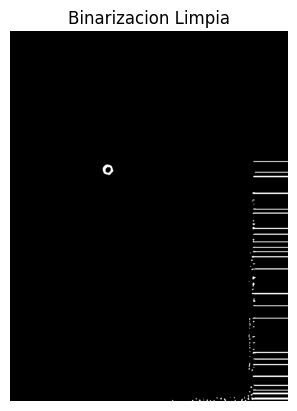

In [5]:
def test_imagen_unica(preprocesor: ImagePreprocessor, class_name: str = "tuercas"):
    imagen_path, random_image = get_random_image(class_name)
    #plot_image(random_image, title="Imagen Original")

    gray_image = preprocesor._convert_to_grayscale(random_image)
    #plot_image(gray_image, title="Imagen en escala de grises")

    standardized_image, padding_info = preprocesor._standardize_size(gray_image)
    #plot_image(standardized_image, title= "Imagen redimensionada a tamaño estándar")

    enhanced_image = preprocesor._apply_gamma(standardized_image, gamma=preprocesor.gamma)
    #plot_image(enhanced_image, title="Imagen aplicado GAMMA")

    blurred_image = preprocesor._apply_bilateral_filter(enhanced_image, preprocesor.d_bFilter)
    #plot_image(blurred_image, title="Imagen aplicado Filtro Bilateral")

    binarized_image = preprocesor._apply_adaptive_binarization(blurred_image,
                block_size=preprocesor.binarization_block_size,
                C=preprocesor.binarizacion_C,
                threshold_type=cv2.THRESH_BINARY
            )
    #plot_image(binarized_image, title="Imagen aplicado Binarizacion Adaptativa")

    cleaned_image = preprocesor._clean_binarization(
                binarized_image,
                open_kernel_size=preprocesor.open_kernel_size,
                close_kernel_size=preprocesor.close_kernel_size
            )
    plot_image(cleaned_image, title="Binarizacion Limpia")

if __name__ == "__main__":
    test_imagen_unica(preprocessor, class_name="tuercas")


📸 Procesando...


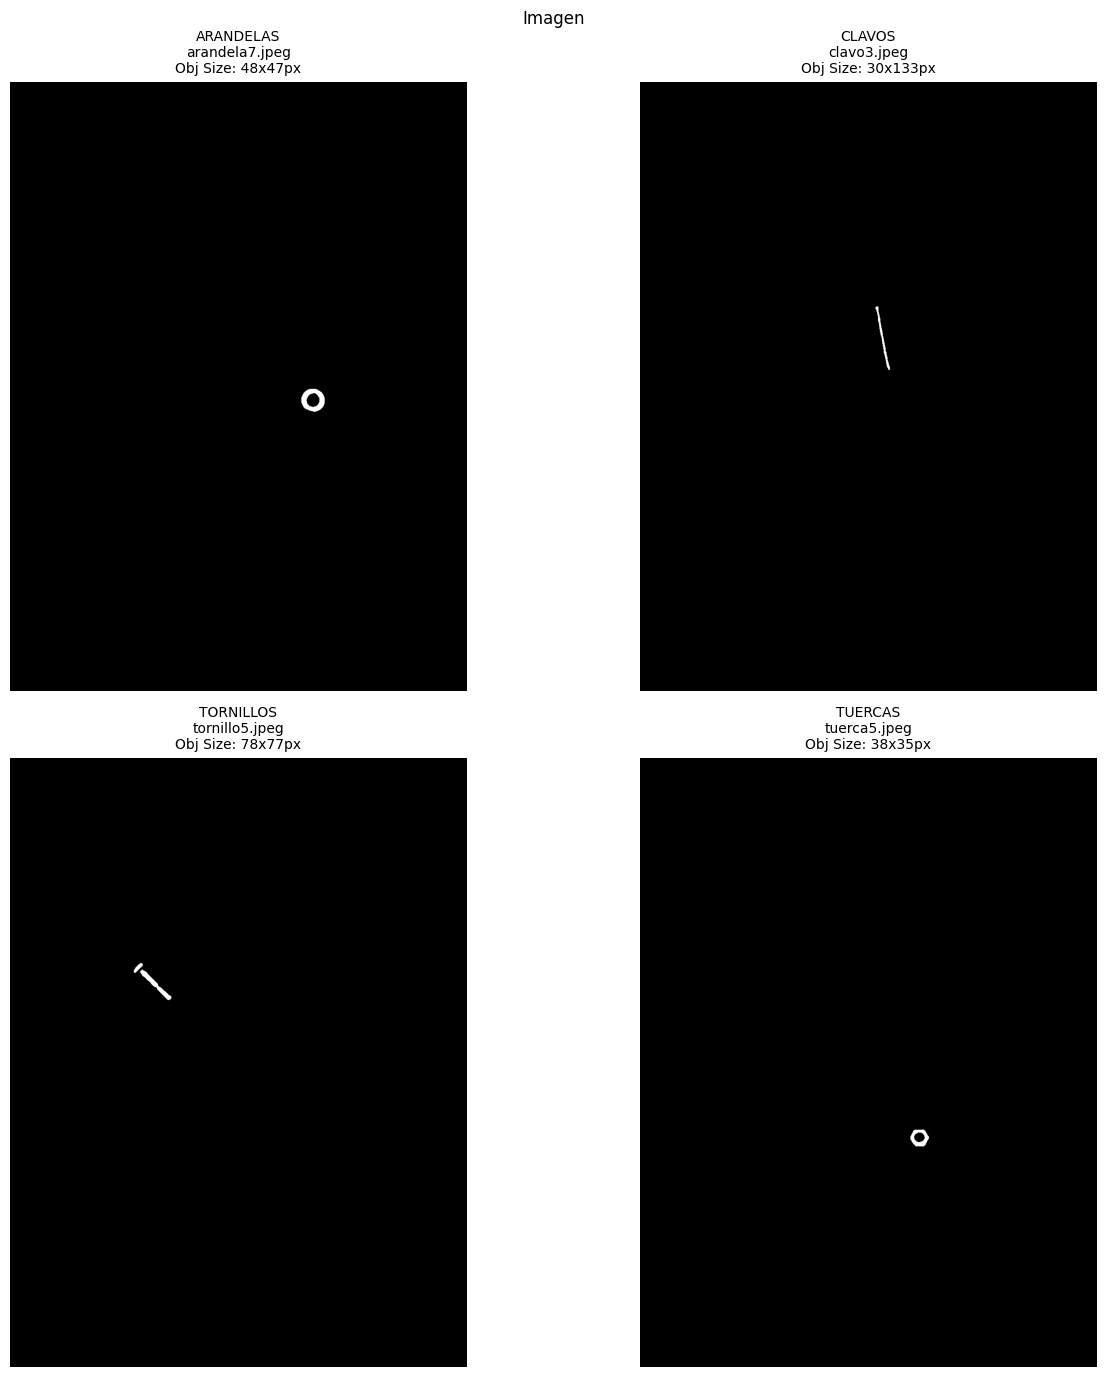

In [9]:
def visualize_preprocessing(preprocessor: ImagePreprocessor):
    # 1. Configuración
    categories = ["arandelas", "clavos", "tornillos", "tuercas"]

    # 2. Configurar el Gráfico (2 filas, 2 columnas)
    fig, axes = plt.subplots(2, 2, figsize=(14, 14))
    fig.suptitle(f"Imagen")
    axes_flat = axes.flatten()

    print(f"📸 Procesando...")

    for i, category in enumerate(categories):
        ax = axes_flat[i]
        
        # Obtener imagen
        path, raw_img = get_random_image(category)
        
        if raw_img is None:
            ax.text(0.5, 0.5, "Sin imagen", ha='center')
            continue
        
        # --- PROCESAMIENTO ---
        processed_binary = preprocessor.process(raw_img)
        
        # Mostrar imagen
        # cmap='gray' es vital porque la imagen binarizada es de 1 solo canal
        ax.imshow(processed_binary, cmap='gray')
        
        # Decoración
        filename = os.path.basename(path)
        y_indices, x_indices = np.where(processed_binary > 0)
        if len(y_indices) > 0:
            h_obj = np.max(y_indices) - np.min(y_indices)
            w_obj = np.max(x_indices) - np.min(x_indices)
            size_info = f"Obj Size: {w_obj}x{h_obj}px"
        else:
            size_info = "Obj perdido (negro)"

        ax.set_title(f"{category.upper()}\n{filename}\n{size_info}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    visualize_preprocessing(preprocessor)

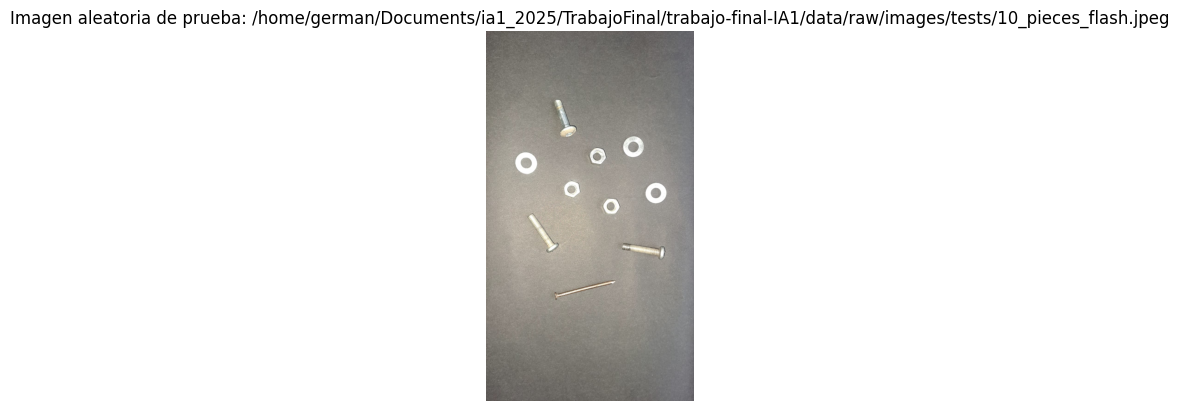

INFO:src.vision.preprocessor:✅ ImagePreprocessor inicializado correctamente


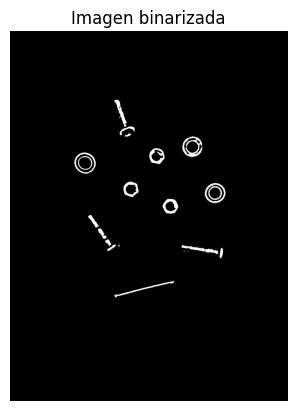

In [7]:
TEST_IMG_PATH = Path(ROOT_PATH + "/data/raw/images/tests")
seed = 13
images_files = list(TEST_IMG_PATH.glob("*.jpg")) + list(TEST_IMG_PATH.glob("*.jpeg")) + \
                  list(TEST_IMG_PATH.glob("*.JPG")) + list(TEST_IMG_PATH.glob("*.JPEG"))

    
rng = random.Random(seed) if seed is not None else random

random_img_path = rng.choice(images_files)
img = mpimg.imread(random_img_path)
plot_image(img, title=f"Imagen aleatoria de prueba: {random_img_path}")

preprocessor = ImagePreprocessor(target_size = (960,1280),
                                gamma = 1.8,
                                d_bFilter = 8,
                                binarization_block_size = 25,
                                binarization_C = -5,
                                open_kernel_size = (3, 3),
                                close_kernel_size = (3, 3),
                                clear_border_margin = 3)

binary_img = preprocessor.process(img)
plot_image(binary_img, title="Imagen binarizada")